In [97]:
import torch
from torch import nn
from input.reading_datasets import *
from input.time_series_module import TimeSeriesDataset
import os
from utils_file import *
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [98]:
torch.cuda.is_available()

True

In [99]:
all_datasets = get_all_datasets(read_from_path=True)

Reading from path


In [100]:
complete_data = get_all_results(False)
# complete_data.query("dataset == 'standwalkjump'")

In [101]:
max_exec = complete_data.groupby(['model_name', 'dataset']).agg({
    'seed': max
}).reset_index()

max_exec.loc[max_exec.model_name.apply(lambda x: True if 'LITE' in x else False)]

,model_name,dataset,seed
61,LITE,articularywordrecognition,10
62,LITE,atrialfibrillation,10
63,LITE,basicmotions,10
64,LITE,cricket,10
65,LITE,natops,10
66,LITE,racketsports,10
67,LITE,standwalkjump,10
68,LITEIntermediate,articularywordrecognition,10
69,LITEIntermediate,atrialfibrillation,10
70,LITEIntermediate,basicmotions,10


In [47]:
agg_results_data = get_all_results(True)

In [48]:
agg_results_data.model_name.unique()

array(['FullyConvolutionalNetwork1D', 'FullyConvolutionalNetwork1DGAP',
       'FullyConvolutionalNetwork1DIntermediate',
       'FullyConvolutionalNetwork1DLate',
       'FullyConvolutionalNetwork1DLateGAP', 'InceptionTime',
       'InceptionTimeIntermediate', 'InceptionTimeLate', 'LITE',
       'LITEIntermediate', 'LITELate', 'MultiLayerPerceptron'],
      dtype=object)

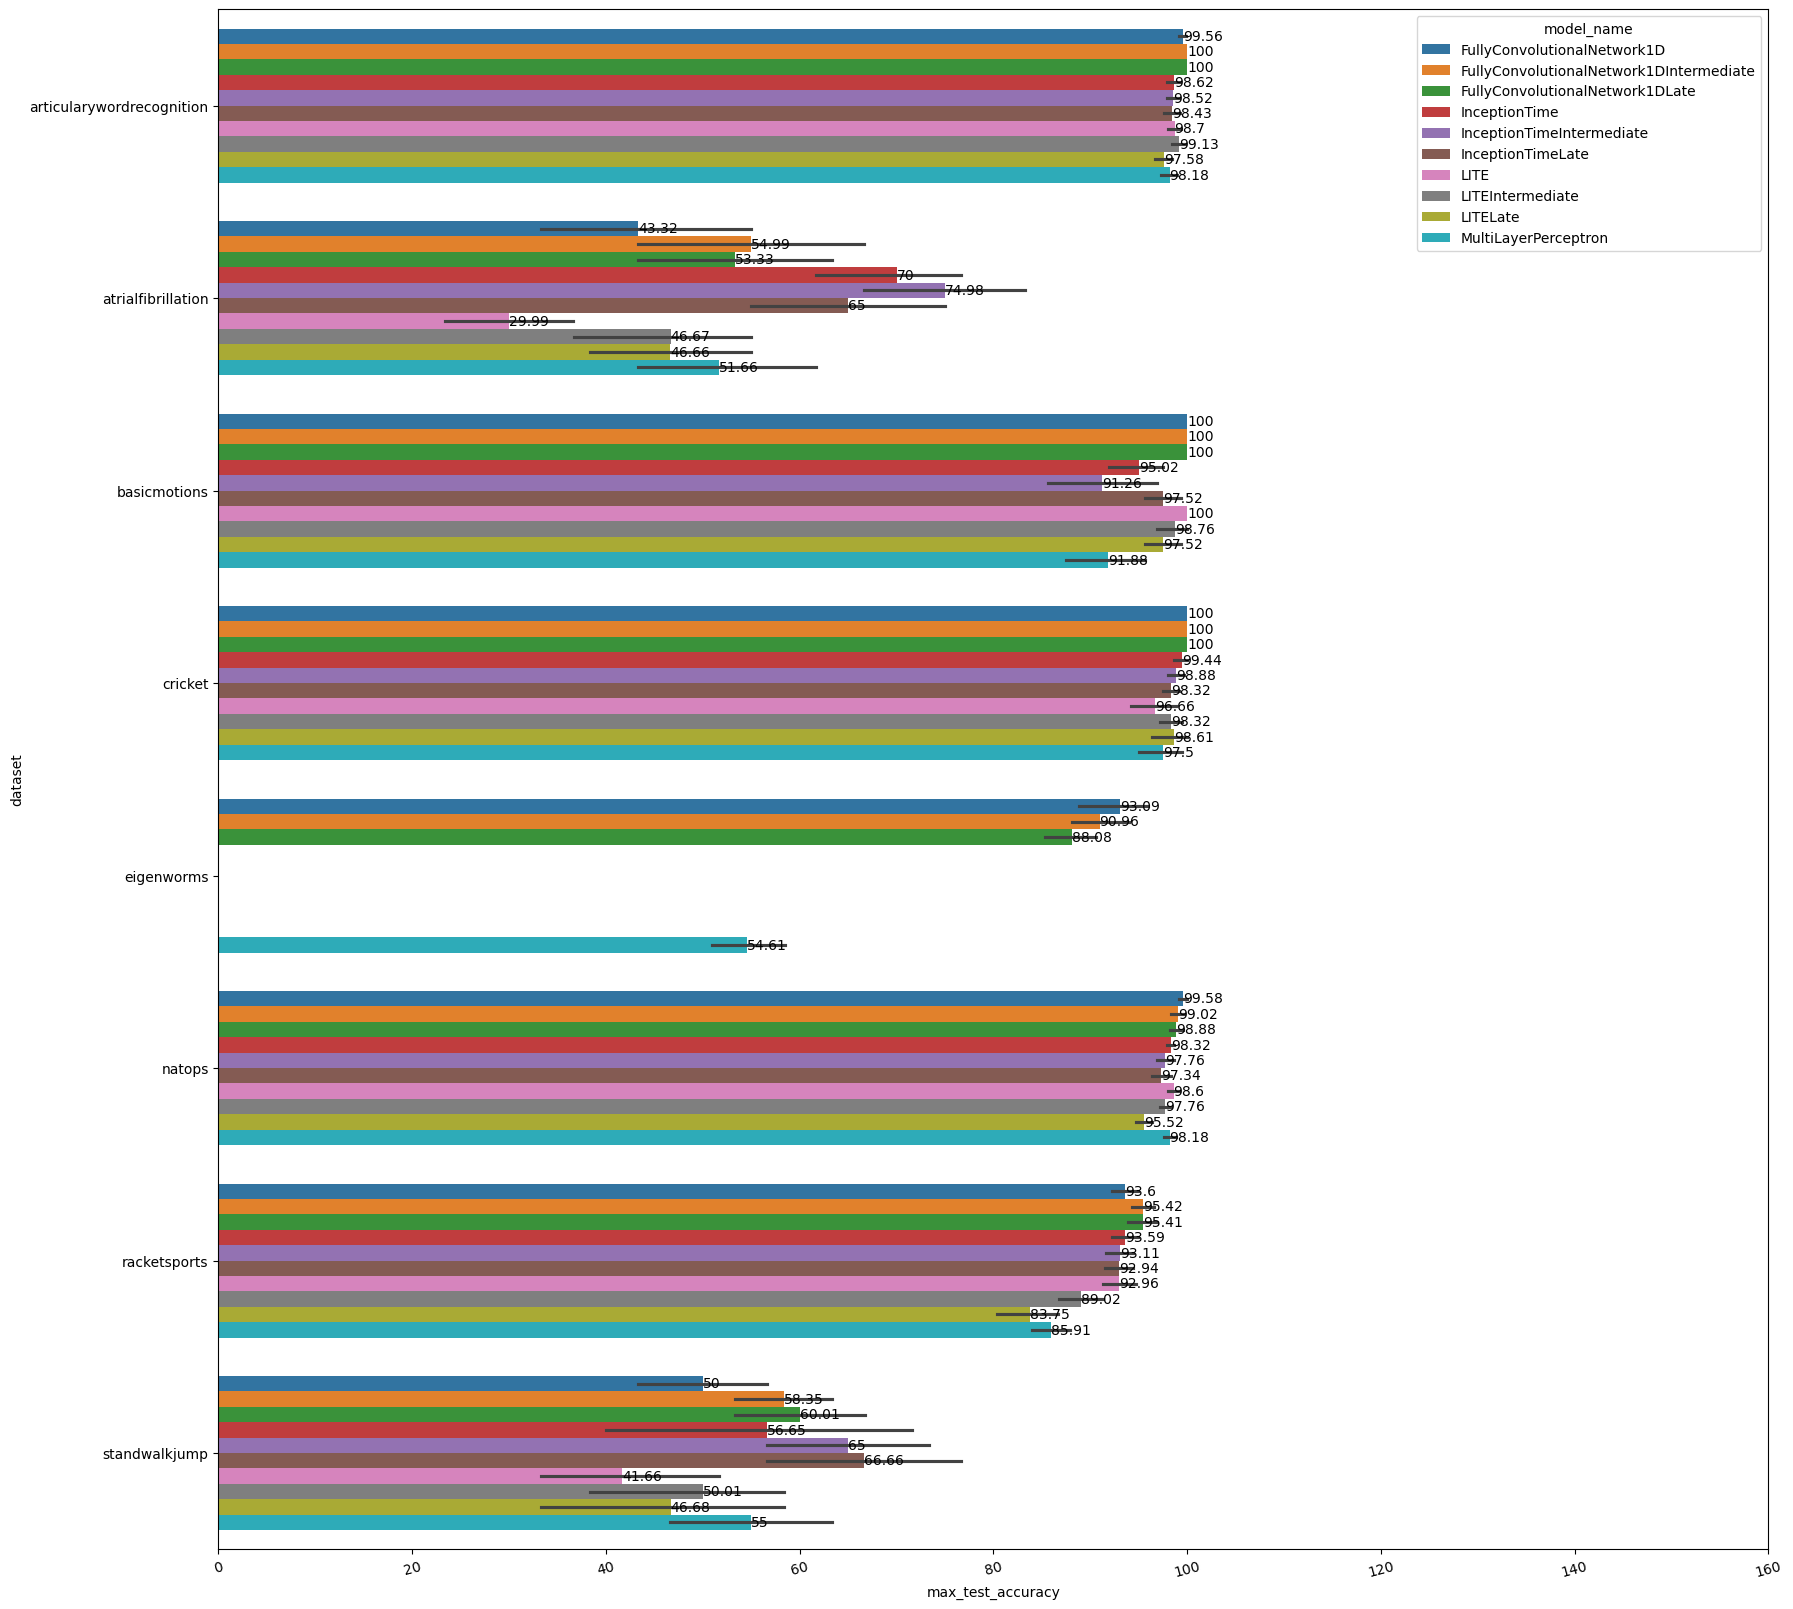

In [54]:
plt.figure(figsize = (20,20))
used_data = complete_data.loc[~complete_data.model_name.isin(['FullyConvolutionalNetwork1DLateGAP', 'FullyConvolutionalNetwork1DGAP'])]

ax = sns.barplot(
    data = used_data, 
    y = 'dataset', 
    x = 100*used_data['max_test_accuracy'].apply(lambda x: round(x, 3)), 
    hue = 'model_name'
)

for i in ax.containers:
    ax.bar_label(i,)

plt.xticks(rotation = 15)
plt.xlim([0, 100*1.6])
plt.show()

In [ ]:
from visualization.critical_diagram import draw_cd_diagram

In [ ]:
critical_diagram_data = complete_data.groupby(['model_name', 'dataset'])['max_test_accuracy'].mean().reset_index().rename({
    'model_name': 'classifier_name',
    'dataset': 'dataset_name',
    'max_test_accuracy': 'accuracy'

}, axis = 1)

In [82]:
used_classifiers = [
    'MultiLayerPerceptron',
    'FullyConvolutionalNetwork1D',
    'FullyConvolutionalNetwork1DIntermediate',
    'FullyConvolutionalNetwork1DLate',
    'InceptionTime',
    'InceptionTimeLate',
    'InceptionTimeIntermediate',
    'LITE',
    'LITEIntermediate',
    'LITELate'
]

In [83]:
used_df = critical_diagram_data.loc[critical_diagram_data.classifier_name.isin(used_classifiers)].query("dataset_name != 'eigenworms'")
# used_df

In [84]:
metrics_df = pd.pivot_table(
    used_df.query("dataset_name != 'eigenworms'"),
    index = 'dataset_name',
    columns = 'classifier_name',
    values = 'accuracy'
)

In [85]:
metrics_df

classifier_name,FullyConvolutionalNetwork1D,FullyConvolutionalNetwork1DIntermediate,FullyConvolutionalNetwork1DLate,InceptionTime,InceptionTimeIntermediate,InceptionTimeLate,LITE,LITEIntermediate,LITELate,MultiLayerPerceptron
dataset_name,,,,,,,,,,
articularywordrecognition,0.995652,1.000000,1.000000,0.986087,0.985217,0.984348,0.986957,0.991304,0.975652,0.981739
atrialfibrillation,0.433333,0.550000,0.533333,0.700000,0.750000,0.650000,0.300000,0.466667,0.466667,0.516667
basicmotions,1.000000,1.000000,1.000000,0.950000,0.912500,0.975000,1.000000,0.987500,0.975000,0.918750
cricket,1.000000,1.000000,1.000000,0.994444,0.988889,0.983333,0.966667,0.983333,0.986111,0.975000
natops,0.995833,0.990278,0.988889,0.983333,0.977778,0.973611,0.986111,0.977778,0.955556,0.981944
racketsports,0.936066,0.954098,0.954098,0.936066,0.931148,0.929508,0.929508,0.890164,0.837705,0.859016
standwalkjump,0.500000,0.583333,0.600000,0.566667,0.650000,0.666667,0.416667,0.500000,0.466667,0.550000


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'One vs One Comparison: LITE Late vs LITE'}, xlabel='LITE Late performance', ylabel='LITE performance'>)

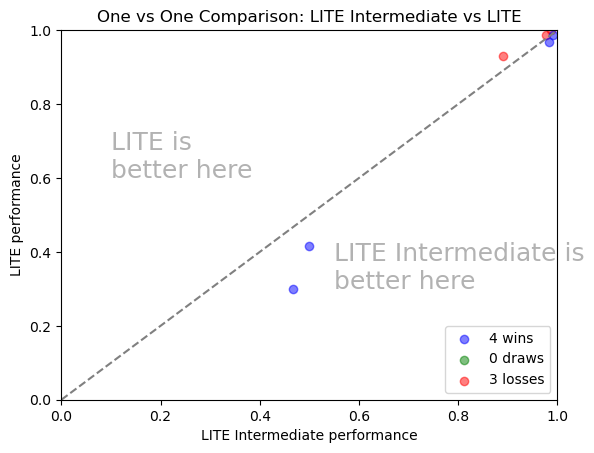

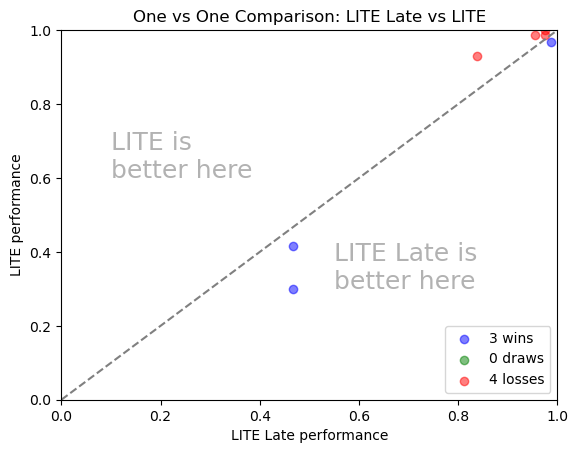

In [86]:
from labicompare.visualization import one_vs_one_plot

one_vs_one_plot(
    metrics_df['LITEIntermediate'].values,
    metrics_df['LITE'].values,
    'LITE Intermediate', 'LITE'
)

one_vs_one_plot(
    metrics_df['LITELate'].values,
    metrics_df['LITE'].values,
    'LITE Late', 'LITE'
)


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'One vs One Comparison: InceptionTime Late vs InceptionTime'}, xlabel='InceptionTime Late performance', ylabel='InceptionTime performance'>)

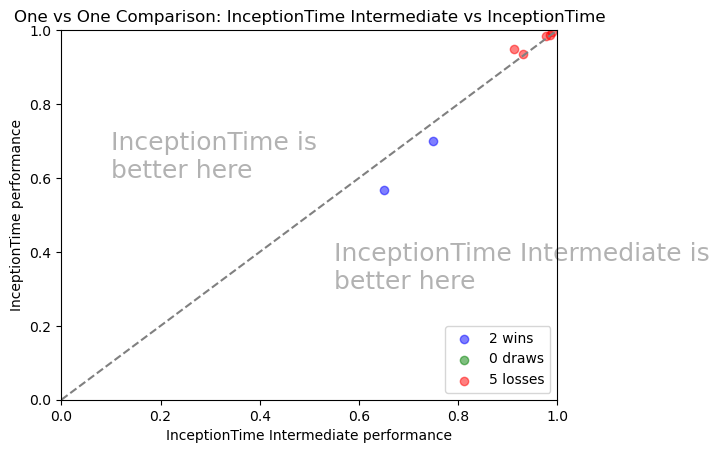

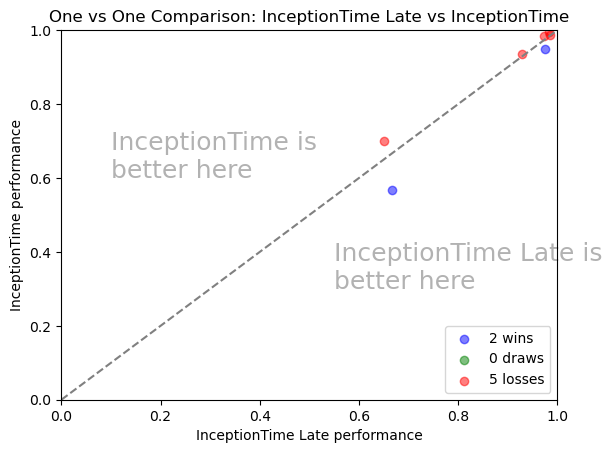

In [79]:
from labicompare.visualization import one_vs_one_plot

one_vs_one_plot(
    metrics_df['InceptionTimeIntermediate'].values,
    metrics_df['InceptionTime'].values,
    'InceptionTime Intermediate', 'InceptionTime'
)

from labicompare.visualization import one_vs_one_plot

one_vs_one_plot(
    metrics_df['InceptionTimeLate'].values,
    metrics_df['InceptionTime'].values,
    'InceptionTime Late', 'InceptionTime'
)


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'One vs One Comparison: FCN Late vs FCN'}, xlabel='FCN Late performance', ylabel='FCN performance'>)

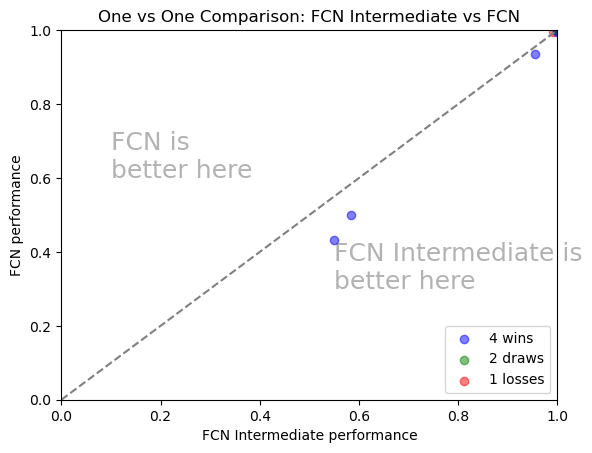

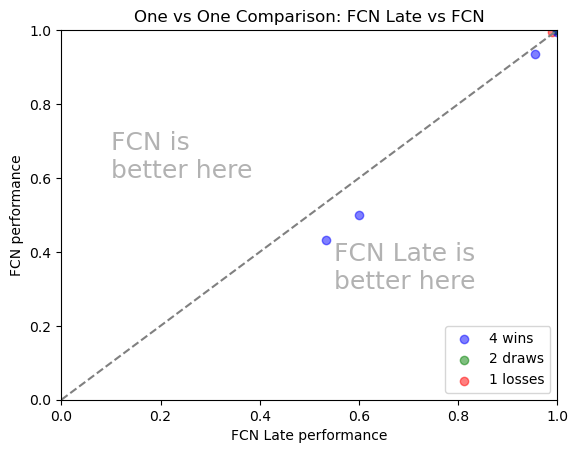

In [78]:
from labicompare.visualization import one_vs_one_plot

one_vs_one_plot(
    metrics_df['FullyConvolutionalNetwork1DIntermediate'].values,
    metrics_df['FullyConvolutionalNetwork1D'].values,
    'FCN Intermediate', 'FCN'
)

from labicompare.visualization import one_vs_one_plot

one_vs_one_plot(
    metrics_df['FullyConvolutionalNetwork1DLate'].values,
    metrics_df['FullyConvolutionalNetwork1D'].values,
    'FCN Late', 'FCN'
)


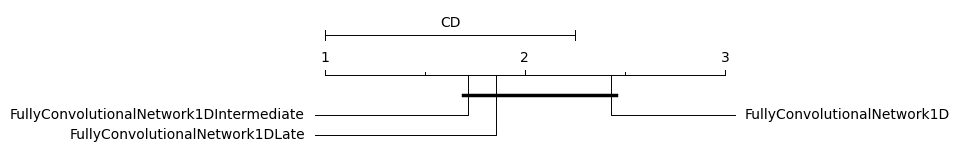

In [ ]:
from labicompare.visualization import critical_difference_diagram

fig = critical_difference_diagram(
    metrics=metrics_df.loc[:, ['FullyConvolutionalNetwork1D', 'FullyConvolutionalNetwork1DIntermediate', 'FullyConvolutionalNetwork1DLate']],
    test='nemenyi',
    alpha=0.05
)

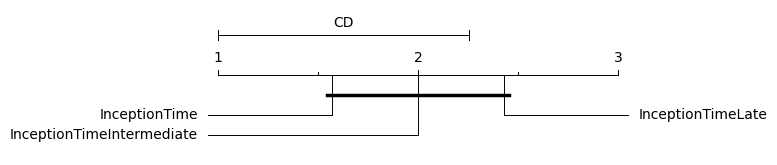

In [94]:
from labicompare.visualization import critical_difference_diagram

fig = critical_difference_diagram(
    metrics=metrics_df.loc[:, ['InceptionTime', 'InceptionTimeIntermediate', 'InceptionTimeLate']],
    test='nemenyi',
    alpha=0.05
)

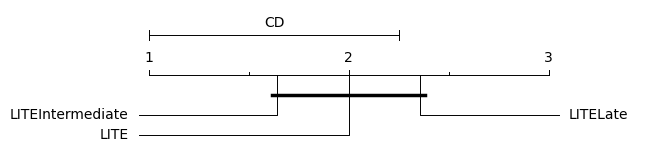

In [95]:
from labicompare.visualization import critical_difference_diagram

fig = critical_difference_diagram(
    metrics=metrics_df.loc[: , ['LITE', 'LITEIntermediate', 'LITELate']],
    test='nemenyi',
    alpha=0.05
)

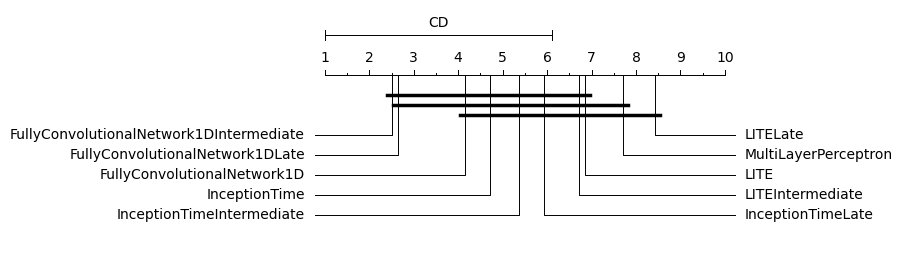

In [96]:
from labicompare.visualization import critical_difference_diagram

fig = critical_difference_diagram(
    metrics=metrics_df,
    test='nemenyi',
    alpha=0.05
)

['FullyConvolutionalNetwork1D' 'FullyConvolutionalNetwork1DIntermediate'
 'FullyConvolutionalNetwork1DLate' 'InceptionTime'
 'InceptionTimeIntermediate' 'InceptionTimeLate' 'MultiLayerPerceptron']
FullyConvolutionalNetwork1D                1.0
FullyConvolutionalNetwork1DIntermediate    0.0
FullyConvolutionalNetwork1DLate            0.0
InceptionTime                              0.0
InceptionTimeIntermediate                  1.0
InceptionTimeLate                          1.0
MultiLayerPerceptron                       0.0
dtype: float64
MultiLayerPerceptron                       6.285714
InceptionTimeLate                          4.714286
InceptionTimeIntermediate                  4.428571
InceptionTime                              3.857143
FullyConvolutionalNetwork1D                3.714286
FullyConvolutionalNetwork1DLate            2.571429
FullyConvolutionalNetwork1DIntermediate    2.428571
dtype: float64
('FullyConvolutionalNetwork1DIntermediate', 'MultiLayerPerceptron', 0.015625, Fa

/home/stbastos/yes/envs/pytorch_enviroment/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  res = hypotest_fun_out(*samples, **kwds)
/home/stbastos/yes/envs/pytorch_enviroment/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: Sample size too small for normal approximation.
  res = hypotest_fun_out(*samples, **kwds)


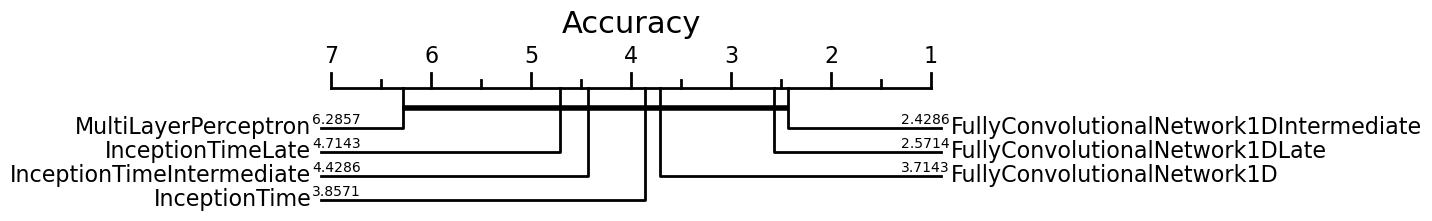

<Figure size 640x480 with 0 Axes>

In [ ]:
result = draw_cd_diagram(
    # df_perf=critical_diagram_data.query("dataset_name != 'eigenworms'"), 
    df_perf=used_df, 
    # df_perf=critical_diagram_data.loc[critical_diagram_data.classifier_name.apply(lambda x: True if 'Fully' in x else False)], 
    title='Accuracy', 
    labels=True, 
    alpha=0.05
)

# plt.imshow('/home/stbastos/experiments/multimodal_time_series_classification/cd-diagram.png')


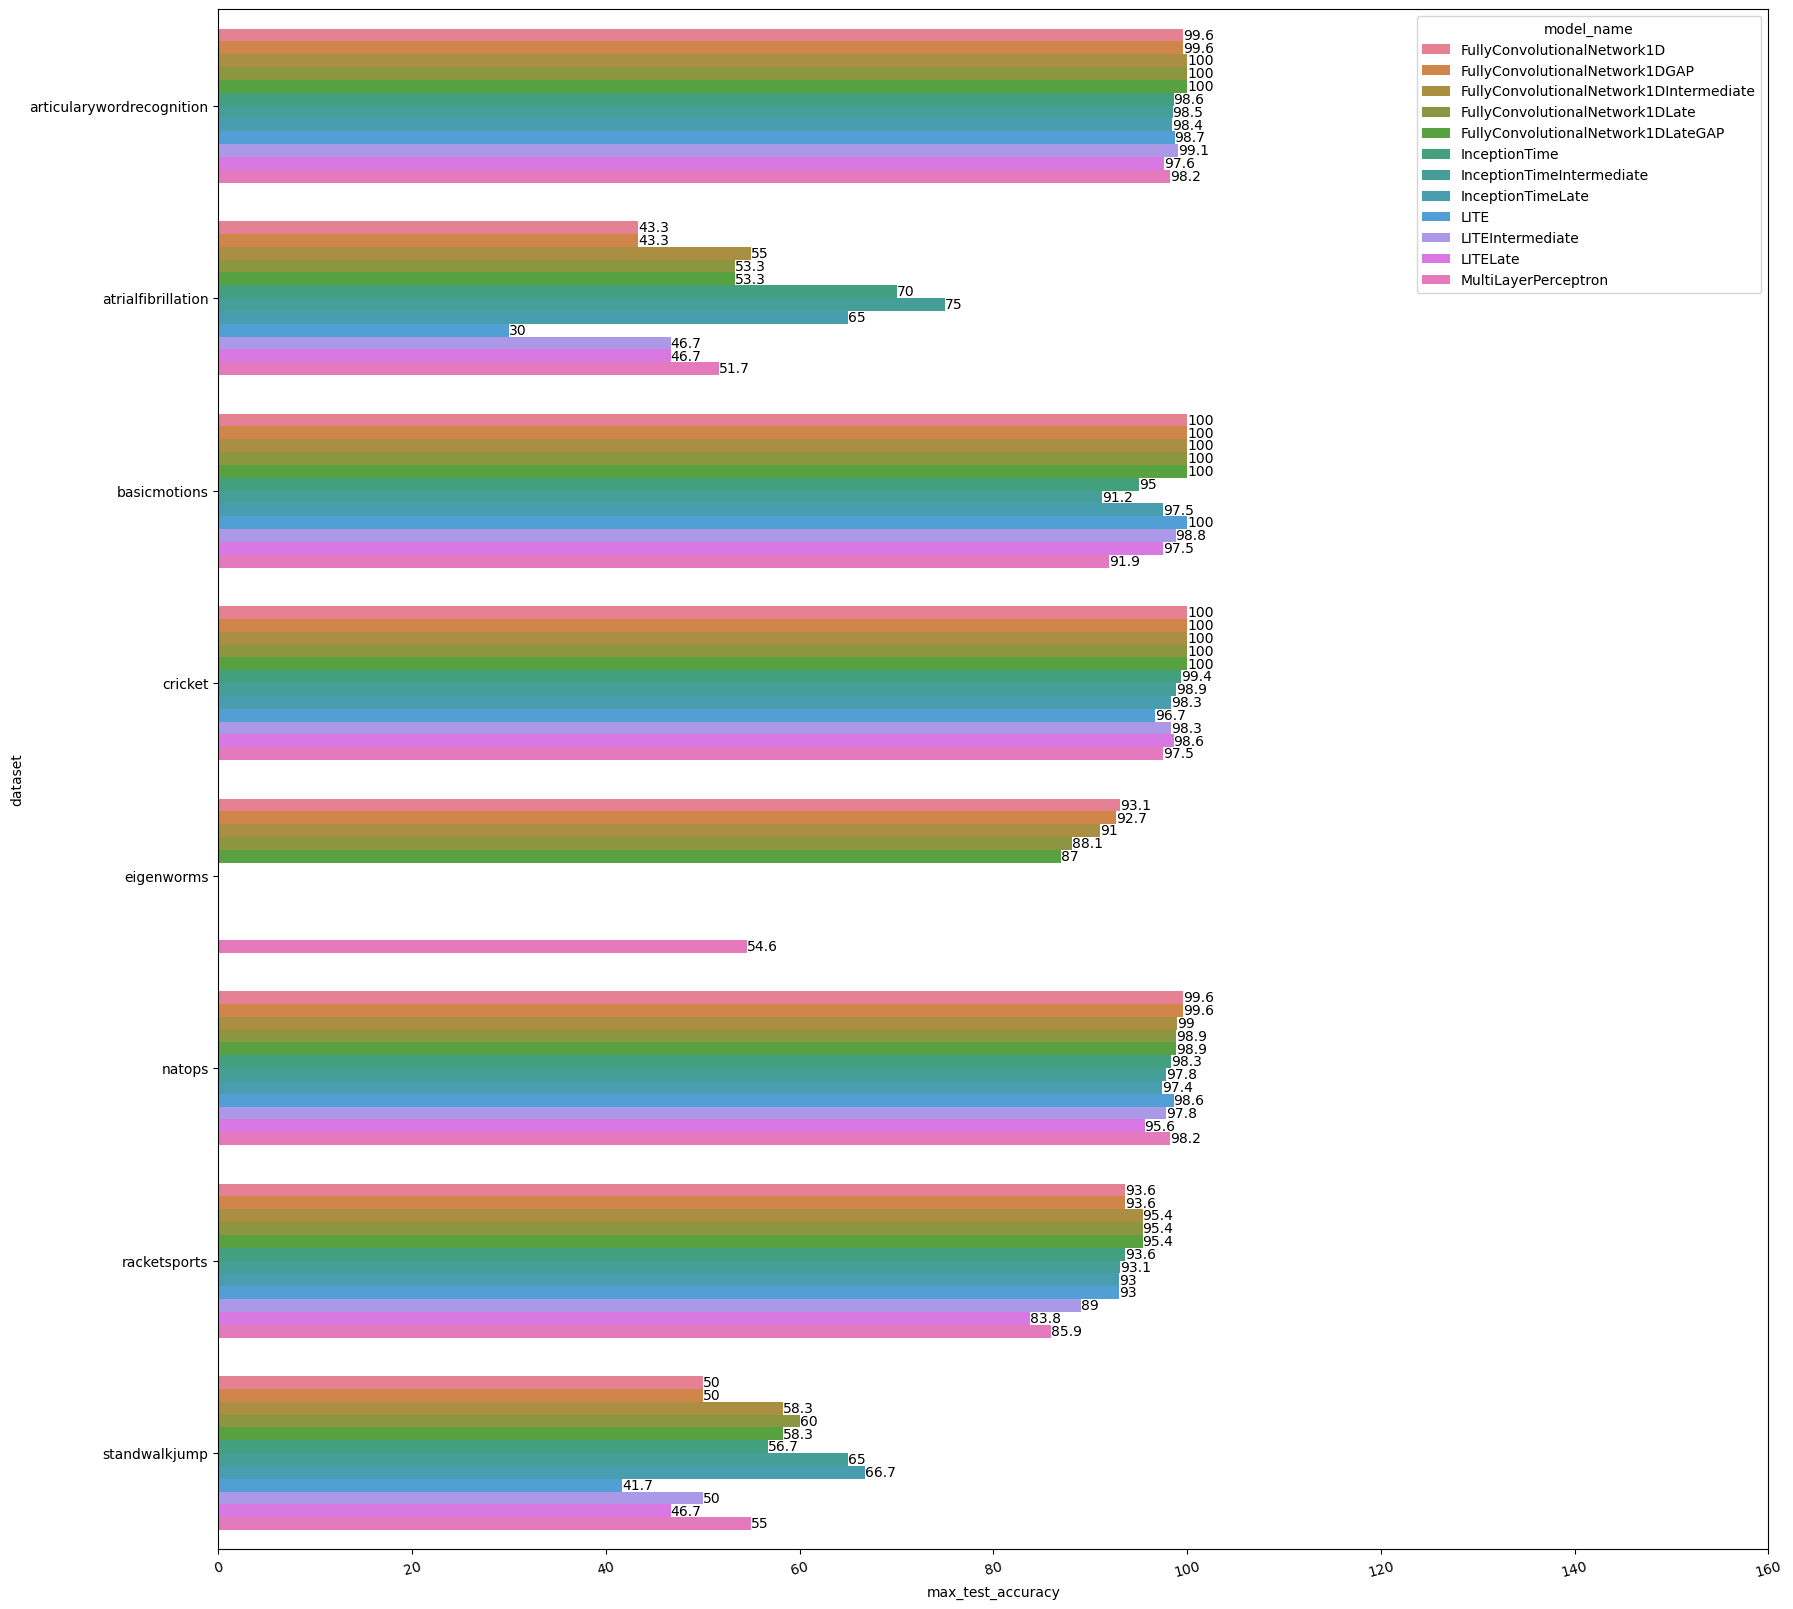

In [ ]:
plt.figure(figsize = (20,20))
ax = sns.barplot(
    data = agg_results_data, #.query("model_name != 'InceptionTime'"), 
    y = 'dataset', 
    x = 100*agg_results_data['max_test_accuracy'].apply(lambda x: round(x, 3)), 
    hue = 'model_name'
)

for i in ax.containers:
    ax.bar_label(i,)

plt.xticks(rotation = 15)
plt.xlim([0, 100*1.6])
plt.show()

In [ ]:
import numpy as np
test_array = np.array([[[-0.0625, -0.25  , -0.5625, -1.    , -1.    , -0.5625, -0.25  ,
         -0.0625,  0.125 ,  0.5   ,  1.125 ,  2.    ,  2.    ,  1.125 ,
          0.5   ,  0.125 , -0.0625, -0.25  , -0.5625, -1.    , -1.    ,
         -0.5625, -0.25  , -0.0625],
        [-0.0625, -0.25  , -0.5625, -1.    , -1.    , -0.5625, -0.25  ,
         -0.0625,  0.125 ,  0.5   ,  1.125 ,  2.    ,  2.    ,  1.125 ,
          0.5   ,  0.125 , -0.0625, -0.25  , -0.5625, -1.    , -1.    ,
         -0.5625, -0.25  , -0.0625],
        [-0.0625, -0.25  , -0.5625, -1.    , -1.    , -0.5625, -0.25  ,
         -0.0625,  0.125 ,  0.5   ,  1.125 ,  2.    ,  2.    ,  1.125 ,
          0.5   ,  0.125 , -0.0625, -0.25  , -0.5625, -1.    , -1.    ,
         -0.5625, -0.25  , -0.0625],
        [-0.0625, -0.25  , -0.5625, -1.    , -1.    , -0.5625, -0.25  ,
         -0.0625,  0.125 ,  0.5   ,  1.125 ,  2.    ,  2.    ,  1.125 ,
          0.5   ,  0.125 , -0.0625, -0.25  , -0.5625, -1.    , -1.    ,
         -0.5625, -0.25  , -0.0625],
        [-0.0625, -0.25  , -0.5625, -1.    , -1.    , -0.5625, -0.25  ,
         -0.0625,  0.125 ,  0.5   ,  1.125 ,  2.    ,  2.    ,  1.125 ,
          0.5   ,  0.125 , -0.0625, -0.25  , -0.5625, -1.    , -1.    ,
         -0.5625, -0.25  , -0.0625],
        [-0.0625, -0.25  , -0.5625, -1.    , -1.    , -0.5625, -0.25  ,
         -0.0625,  0.125 ,  0.5   ,  1.125 ,  2.    ,  2.    ,  1.125 ,
          0.5   ,  0.125 , -0.0625, -0.25  , -0.5625, -1.    , -1.    ,
         -0.5625, -0.25  , -0.0625],
        [-0.0625, -0.25  , -0.5625, -1.    , -1.    , -0.5625, -0.25  ,
         -0.0625,  0.125 ,  0.5   ,  1.125 ,  2.    ,  2.    ,  1.125 ,
          0.5   ,  0.125 , -0.0625, -0.25  , -0.5625, -1.    , -1.    ,
         -0.5625, -0.25  , -0.0625],
        [-0.0625, -0.25  , -0.5625, -1.    , -1.    , -0.5625, -0.25  ,
         -0.0625,  0.125 ,  0.5   ,  1.125 ,  2.    ,  2.    ,  1.125 ,
          0.5   ,  0.125 , -0.0625, -0.25  , -0.5625, -1.    , -1.    ,
         -0.5625, -0.25  , -0.0625],
        [-0.0625, -0.25  , -0.5625, -1.    , -1.    , -0.5625, -0.25  ,
         -0.0625,  0.125 ,  0.5   ,  1.125 ,  2.    ,  2.    ,  1.125 ,
          0.5   ,  0.125 , -0.0625, -0.25  , -0.5625, -1.    , -1.    ,
         -0.5625, -0.25  , -0.0625]]])

<Axes: >

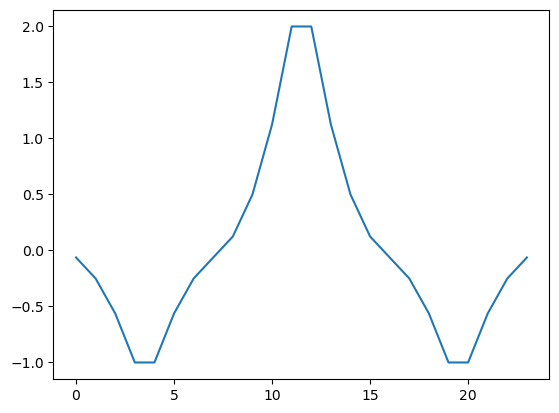

In [ ]:
import seaborn as sns
sns.lineplot(test_array[0][0])